Code from TP2_etu.py

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


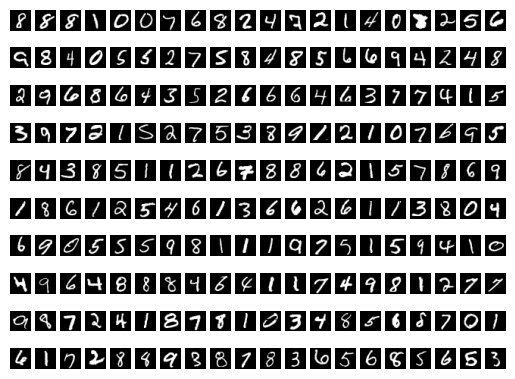

In [ ]:
# Import libraries and modules
import numpy as np
import time
np.random.seed(123)  # for reproducibility

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf # used for transformations
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import  Dense, Flatten, Dropout, Convolution2D, MaxPooling2D
from utilitaire import affiche





##################################################
# I - Load pre-shuffled MNIST data train and test sets
##################################################
from tensorflow.keras.datasets.mnist import load_data
# load dataset
(X_train, y_train), (X_test, y_test) = load_data() # il va charger les images

#Ne conserve que 10% de la base
X_train, pipo, y_train, pipo = train_test_split(X_train, y_train, test_size=0.95) # We take the 5% of the X_train of base and 95% for pipo
X_test, pipo, y_test, pipo = train_test_split(X_test, y_test, test_size=0.95) # We take the 5% of the X_test of base


# On affiche les 200 premiers images
for i in range(200):
  plt.subplot(10,20,i+1)
  plt.imshow(X_train[i,:].reshape([28,28]), cmap='gray')
  plt.axis('off')
plt.show()

# Preprocess input data


# We change the dimension from 3000 x 28 x 28 ( 3000, 28, 28) and if we check the reshape function (https://www.codecademy.com/resources/docs/numpy/built-in-functions/reshape)
# we see that that the final will be a matrix (3000 x 28 x 28 x 1).

# Mettre les donnes en forme des torseurs (28 x 28 x 1), avec 1 = profondeur [reshape]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) # It is all about changing the dimension fro X_train

# We are not sure if the X_test has unique exemples in it
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], 1) # It is all about changing the dimension fro X_test
X_train = X_train.astype('float32') # Declaring the type of float32 (it is a casting)
X_test = X_test.astype('float32')
X_train /= 255 #Pour avoir des valeurs entre 0 et 1
X_test /= 255

# Process class labels
Y_train = tf.keras.utils.to_categorical(y_train, 10) # It generates a "matrice de confusion" with 10 classes according to the y_train labels
Y_test = tf.keras.utils.to_categorical(y_test, 10)

# Si on fait la classification, à la sortie on veut avoir un vecteur FC [1 0 0 1 ...]T par exemple,



# Que réalise-t-il ? Justifier chaque ligne.

Βλέπε τα σχόλια στον κώδικα

# Combien y a-t-il d’images dans la base de test ? Dans la base d’apprentissage ? Quelle est la taille des images ? Combien y a-t-il de classes ?

- X_train: 3000 images (28x28)
- X_test: 500 images (28x28)
- There are 10 classes according to the Y labels (we confirm it at teh line "tf.keras.utils.to_categorical(y_train, 10)") - (0 to 9)

# En quoi consiste le pré-traitement des données d’entrées ? Pourquoi le réalise-t-on ?

Reshape, pour metrte les donnes comme un terseur
Mettre les sorties sur la forme desire.

# A quoi sert la fonction tf.keras.utils.to_categorical ? Quelle est la taille de y_train ? de Y_train ? Commenter.

Si on fait la classification, à la sortie on veut avoir un vecteur FC [1 0 0 1 ...]T par exemple, donc, il va creer un Y_test and Y_train qui est:

Y_train = 3000 x 10

Y_test = 500 x 10

---


In [ ]:
##################################################
# II - Régression logistiques
##################################################
# II.1. Define model architecture
# Define model architecture
inputs = Input(shape=(28,28,1))
x = inputs
# x1 = x
x = Convolution2D(32, (3, 3), activation='relu', padding='same')(x)  # Ajout de la couche convolutionnelle 32 filtres
x = Convolution2D(64, (3, 3), activation='relu', padding='same')(x)  # Ajout de la couche convolutionnelle 64 filtres
# x = tf.keras.layers.add([x, x1]) skip here
# Calcul des paramtres total: 32(3x3x1+1) + 64(3x3x32+1) + (64x14x14x256+256) + (256 x 300 + 300) + (300 x 10 + 10)
x = MaxPooling2D(pool_size = (3, 3), strides = 2)(x)  # Ajout de la couche de pooling (3x3)

x=Flatten()(x)
x = Dense(256, activation='relu')(x) # on ajoute une couche cahe
x = Dropout(0.2)(x)  # on ajoute un dropout
x = Dense(300, activation='relu')(x) # on ajoute encore une couche cahe
x = Dropout(0.2)(x)

outputs=Dense(10, activation='softmax')(x)
model = Model(inputs, outputs) # declaration of the model
model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 256)                 │       1,384,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 300)                 │          77,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,474,382 (5.62 MB)

 Trainable params: 1,474,382 (5.62 MB)

 Non-trainable params: 0 (0.00 B)

# Pourquoi utilise-t-on la fonction d’activation softmax ?

Softmax: pour la classification (mettre en probabilites). Dense va declarer une couche de 10 neurones qui ont une fonction d'activation qui est softmax.

# Combien y a-t-il de paramètres à apprendre (Trouver les par le calcul puis vérifier) ?

Sur le summary on voit qu'il y a 7850 parametres à estimer.

**In order to find the number of parametres:**

For intrance we have an exemple 28 x 28 x 1 then we have 10 neurones sir la couches caches, ainsi on a: 28 x 28 x 1 x 10 + 10 = 7850. This formula comes from the course.

# A quoi sert la commande Flatten ?

**Flaten:** les mettres sur une forme de vecteur. Ca sert de le mise en plan.

---

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.1062 - loss: 2.2970 - val_accuracy: 0.1980 - val_loss: 2.2507
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2103 - loss: 2.2332 - val_accuracy: 0.3960 - val_loss: 2.1365
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3598 - loss: 2.1000 - val_accuracy: 0.5680 - val_loss: 1.7234
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5378 - loss: 1.6167 - val_accuracy: 0.6620 - val_loss: 1.0478
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6369 - loss: 1.1313 - val_accuracy: 0.8020 - val_loss: 0.6586
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6997 - loss: 0.9035 - val_accuracy: 0.7900 - val_loss: 0.6192
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7408 - loss: 0.7487 - val_accuracy: 0.7600 - val_loss: 0.7251
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7948 - loss: 0.6202 - val_accuracy: 0.7820 - v

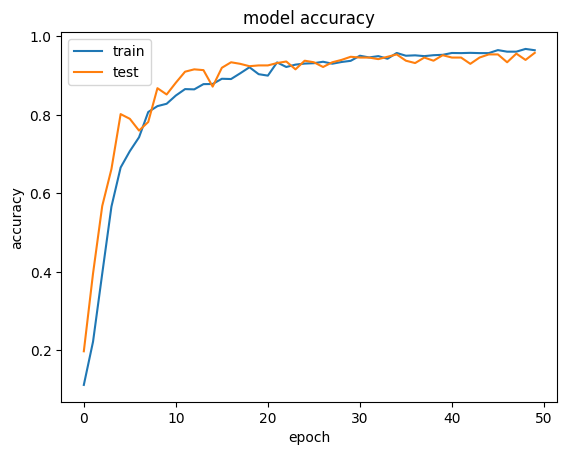

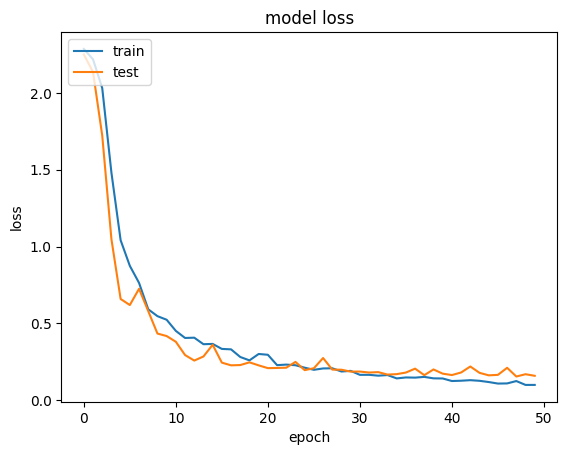

lr= 0.04 batch_size= 250 epochs= 50
Temps d apprentissage 14.306846857070923


In [ ]:
# II.2. Apprentissage
lr= 0.04
batch_size= 250
epochs=50

sgd1= tf.keras.optimizers.SGD(learning_rate=lr) # On utilise un optimizer [PAS VU EN COURS]

model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy']) # On declare la fonction de perte. Voir la question ci dessou spour une cas de regression.
tps1 = time.time()


history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(X_test, Y_test)) # # c'est la qui va apprende. Apres on declare les donnes de validation.
tps2 = time.time()
#print(history.history.keys())

affiche(history)
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs)
print('Temps d apprentissage',tps2 - tps1)

# Que représente lr, batch et epochs ?

*   lr: pas d'apprentisage
*   Batchs: c'est des sous-ensembles de la base de donne declare sur la fonction avec une taille specifique (ici le X_train avec une taille 256)
*   Epochs : Combien de fois on va iterer tous les exemples sur la base de donnes d'apprentisage, ici on va iterer 10 fois. Nombre des fois que tous les exemples sont vue dans une base d'apprentisage.

Remarque: Sur un exemple de trois packets (batches), on traite le premier packet, le deuxieme packet, le troisieme packet. Tout ca fait 1 epoche. Dans ce cas, aussi on a traite chaque exemple une seule fois. Donc là, quand on dit 100 epoches, ca veut dire qu'on considere

# Pourquoi utilise-t-on 'categorical_crossentropy’ comme fonction perte ?

Car on fait la classification. Sinon on aurait pris le MSE (means square error) pour la regression.

# Que réalise la fonction affiche(history) ? Est-ce que l’apprentissage se passe bien ?

On voit les resultats de chaque epoche en fonction de batchs. Apres on affiche un histogramme qui est en fait notre representation de la fonction perte.

---
**Remarque:** On fait bouger le lamda pour avoir la fonction de perte le plus petit possible (la plus perfomante). Le lamda il faut pas etre tros grand, sinon il ne va pas converger (il va diverger).

Pour chosiir le lamda, on essaye et on regarde la fonction de perte.

---

In [ ]:
# II.3. Evaluation du modèle
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Test loss: 0.4886302649974823
Test accuracy: 0.8859999775886536
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Confusion Matrix
[[42  0  1  0  0  0  1  0  0  0]
 [ 0 46  0  1  0  0  1  0  0  0]
 [ 0  1 47  0  0  0  0  0  2  0]
 [ 0  0  1 34  0  2  0  0  2  0]
 [ 0  1  0  0 53  0  0  0  1  3]
 [ 0  2  0  3  1 39  0  1  4  2]
 [ 1  1  0  0  1  1 49  0  0  0]
 [ 0  3  0  0  0  0  0 46  1  2]
 [ 0  0  1  2  1  0  0  0 44  1]
 [ 1  2  1  0  5  1  0  2  0 43]]


**Dropout:** Il enleve des neurones aleartoirement pour lutter contre les sur-apprentisage. Sur un eprochaine epoche, il y a d'autres neurones qui ne sont pas pris en compte, et d'autres qui sont pris en compte.

---

# Que renvoie model.predict et pourquoi utilise-t-on y_pred.argmax ?

*   y_pred = model.predict(X_test) : On donne la base de donnes de test et on va predire leurs classe
*   y_pred = y_pred.argmax(axis=-1) : Ca nous nous dit la classe predit. Par exemple, sa sera la sortie de 10 neurones pour tous les exemples et donc on aura un vecteur tel que [0 0 0 1 0 0 0 0 0 0]T * classes, pour dire que c'est du classe 3 par exemple.

# Refaire l’apprentissage en réglant au mieux les valeurs de lr, batch et epochs. Quel est le meilleur taux de reconnaissance obtenu ?

Apres plusieurs tests, le lr choisi est 0.15

---

Plus de non linearite, plu sle reseau deviens complexe et plus le reseau peut apprendre.

---

# Application MLP

On va ajouter une couche caché (partie MLP) pour aller plus loin. C'est du MLP, donc cest une couche Dense: Dense(256, activation='RELU')(x). **Regarder la partie II.1 qui etait modifié.**

# Combien y a-t-il de paramètres à estimer (trouver leur nombre par le calcul puis vérifier)?

For intrance we have an exemple 28 x 28 x 1 then we have 256 neurones sur la couches caches, ainsi on a: 28 x 28 x 1 x 256 + 256  = 200.960

Now for the next couche, we have 256 entries because we have 256 neurones and 10 neuros in the current couche cache, so we take:
256x10 + 10 = 2.570

Total = 203.530

# Changer les valeurs du pas d’apprentissage, du momentum, du batch_size pour optimiser les performances du réseau (les valeurs par défaut sont lr=0.01).

On choisi lr = 0.04 pour stabiliser un peu l'apprentisage et epoches = 50

# Que se passe-t-il si le pas d’apprentissage est trop grand ? Trop petit ?

Si le lamda est trop grand, il va diverger. Si il est trop petit, il ne va pas converger facilement

# Ajouter une couche de dropout. Comment agit-elle ?

Un dropout nous aide de diminuer la variance entre le modele entrainé et le model qu'on test. On a un bon resultat pour un drpout de 0.2 en general (20%)


# Ajouter une seconde couche cachée. Que se passe-t-il ?

On a choisi d'ajouter une deuxieme couche de 300 neurones. Les parametres total sont 281.070. SI on regrade notre model, on voit que à partir d'un moment donnée, on va avoir une variance qui augmente.

---

# **CNN**

# On ajoute une couche convolutionnelle composée de 64 filtres 3x3 suivie de la fonction d’activation RELU.

Combien y a-t-il de paramètres à estimer (trouver les par le calcul puis vérifier)?
Comment est la convergence du réseau ? Est-elle plus rapide, plus lente ? Comment
sont les résultats ? **bold text**

```
inputs = Input(shape=(28,28,1))
x = inputs
x = Convolution2D(32, (3, 3), activation='relu', padding='same')(x)  # Ajout de la couche convolutionnelle

x=Flatten()(x)
x = Dense(256, activation='relu')(x) # on ajoute une couche cahe
x = Dropout(0.2)(x)  # on ajoute un dropout
x = Dense(300, activation='relu')(x) # on ajoute encore une couche cahe

outputs=Dense(10, activation='softmax')(x)
```

**Calcul des paramtres total:** 32(3x3x1+1) + (32x28x28x256 + 256) + (256 x 300 + 300) + (300 x 10 + 10)

# On ajoute encore une couche convolutionnelle composée de 64 filtres 3x3 suivie de la fonction d’activation RELU

**Calcul des paramtres total:** 32(3x3x1+1) + 64(3x3x32+1) + (64x28x28x256+256) + (256 x 300 + 300) + (300 x 10 + 10) = 12.944.238

# MaxPooling

Ca nous permet de diminuer la taille de l'image suivis de deux convolutions. Par extension, on passe beacoup moins des entres à la premier couche cahé. AU debut on avec =~ 12.000.000 parametres et maintenant on a =~ 2.000.000 parametres meme si on a 64 images en entre de cette premier couche.

# Nouveau dropout ?

J'ai ajoute un nouveau dropout apres la deuxieme couche caché pour diminuer la varience de resultats suivantes du traitment de la premier couche. Selon les graphes, il a l'aire de bien marcher.

# Sur ces images, il n’y a pas grand intérêt à utiliser un CNN plutôt qu’un MLP. Pourquoi ? Quelle va être la force des CNN ?

vu que les images sont de petit taille, on utilise MLP, sinon on est oblige de diminuer la taille via Pooling et des convolutions pour filter et paramettrer. Toujours on utilise un reseau hybrid.

# Conclusion

**On peut conclure que ici l'accuracy etait ameliore vu que c'est 0.95. Avant c'etait proche à 0.84. C'est bien ça!**

---





In [ ]:
x1 = x
x=Convolution2D(32,(3,3), activation='relu',padding='same')(x)
x=Convolution2D(32,(3, 3), activation='relu',padding='same')(x)
x = tf.keras.layers.add([x, x1])

On peut conclure que: vous que le reseau n'est pas profond, il n'y a pas interet de faire un skip sur les parametres. Ici, il n'ameliore pas les resultats.